In [6]:
import pandas as pd
import numpy as np
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = r"D:\BIA Data Science and AI\Capstone project\Movie-Prediction-main\Movie-Prediction\movie_metadata.csv"
data = pd.read_csv(file_path)
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [8]:
print ("Dataset Shape:",
       data.shape)

print("Data Info:")
print(data.info())

print("Summary Statistics:")
print(data.describe()) #understand dataset structure

Dataset Shape: (5043, 28)
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_

In [10]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
data_path = r"D:\BIA Data Science and AI\Capstone project\Movie-Prediction-main\Movie-Prediction\movie_metadata.csv" # Update the path if necessary
df = pd.read_csv(data_path)  # Make sure this line is active to load the data into `df`

# Handle missing values
# Replace missing values in categorical columns with an empty string
categorical_columns = ['director_name', 'actor_1_name', 'genres']
for col in categorical_columns:
    df[col].fillna('', inplace=True)

# Replace missing values in numerical columns with 0
numerical_columns = ['duration', 'gross', 'imdb_score']  # Adjust based on your dataset
for col in numerical_columns:
    df[col].fillna(0, inplace=True)

# Label encode categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string to handle empty values
    label_encoders[col] = le

# Feature selection
selected_features = ['imdb_score']
df = df[selected_features]

# Categorize IMDB Scores into 'Hit', 'Average', or 'Flop'
def classify_movie(score):
    if score <= 3:
        return 'Flop'
    elif 3 < score <= 6:
        return 'Average'
    else:
        return 'Hit'

df['Classify'] = df['imdb_score'].apply(classify_movie)

# Save preprocessed data to a CSV file
output_path = r"D:\BIA Data Science and AI\Capstone project\Movie-Prediction-main\Movie-Prediction\preprocessed_movie_data.csv"
df.to_csv(output_path, index=False)

print(f"Preprocessed data saved to: {output_path}")


Preprocessed data saved to: D:\BIA Data Science and AI\Capstone project\Movie-Prediction-main\Movie-Prediction\preprocessed_movie_data.csv


C:\Users\gargi\AppData\Local\Temp\ipykernel_29800\3801567396.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('', inplace=True)
C:\Users\gargi\AppData\Local\Temp\ipykernel_29800\3801567396.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

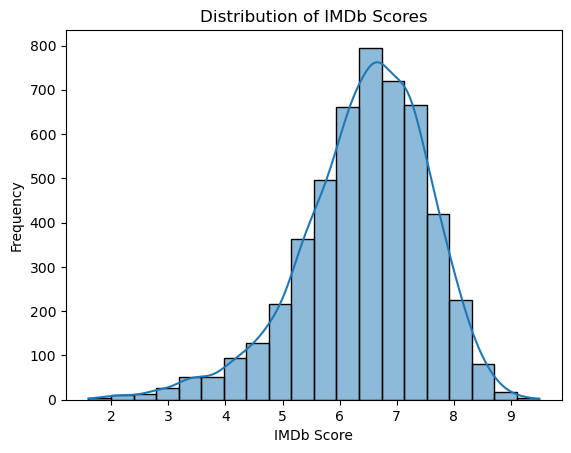

In [12]:
# Distribution of IMDb scores
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.histplot(data['imdb_score'], bins=20, kde=True)
plt.title("Distribution of IMDb Scores")
plt.xlabel("IMDb Score")
plt.ylabel("Frequency")
plt.show()

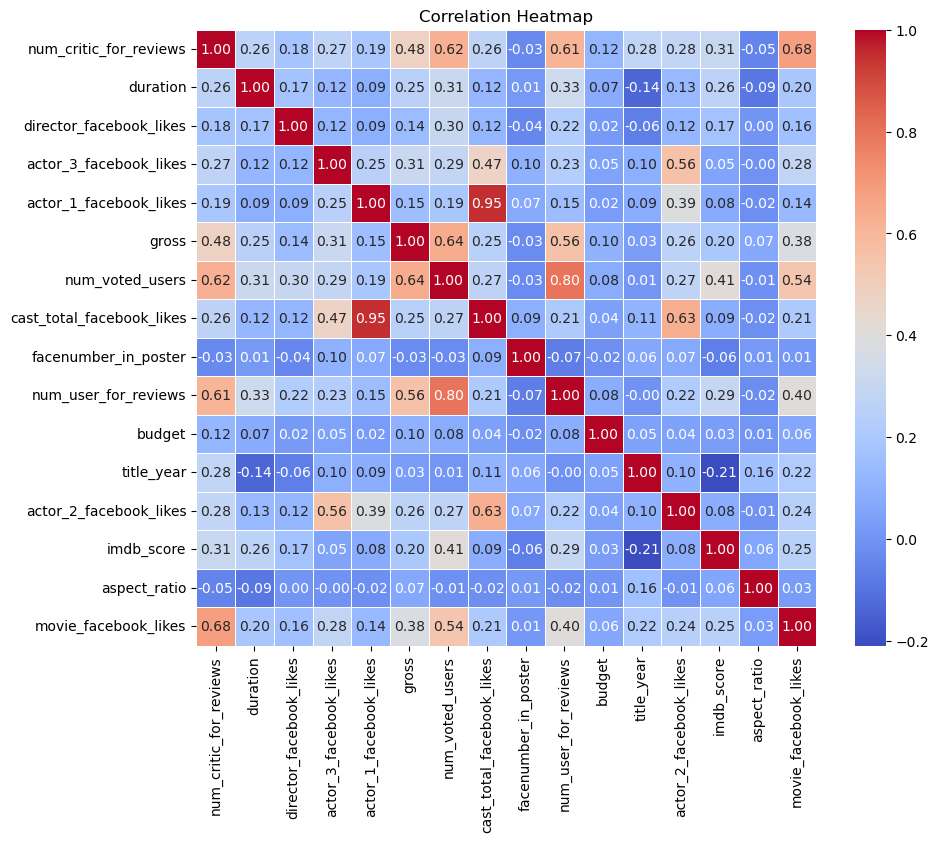

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Select Numeric Columns Only
numeric_data = data.select_dtypes(include=['int64', 'float64'])


if numeric_data.shape[1] > 1:  
    correlation_matrix = numeric_data.corr()

    # Plot Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("Not enough numeric data to generate a correlation heatmap.")

C:\Users\gargi\AppData\Local\Temp\ipykernel_29800\2132266829.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


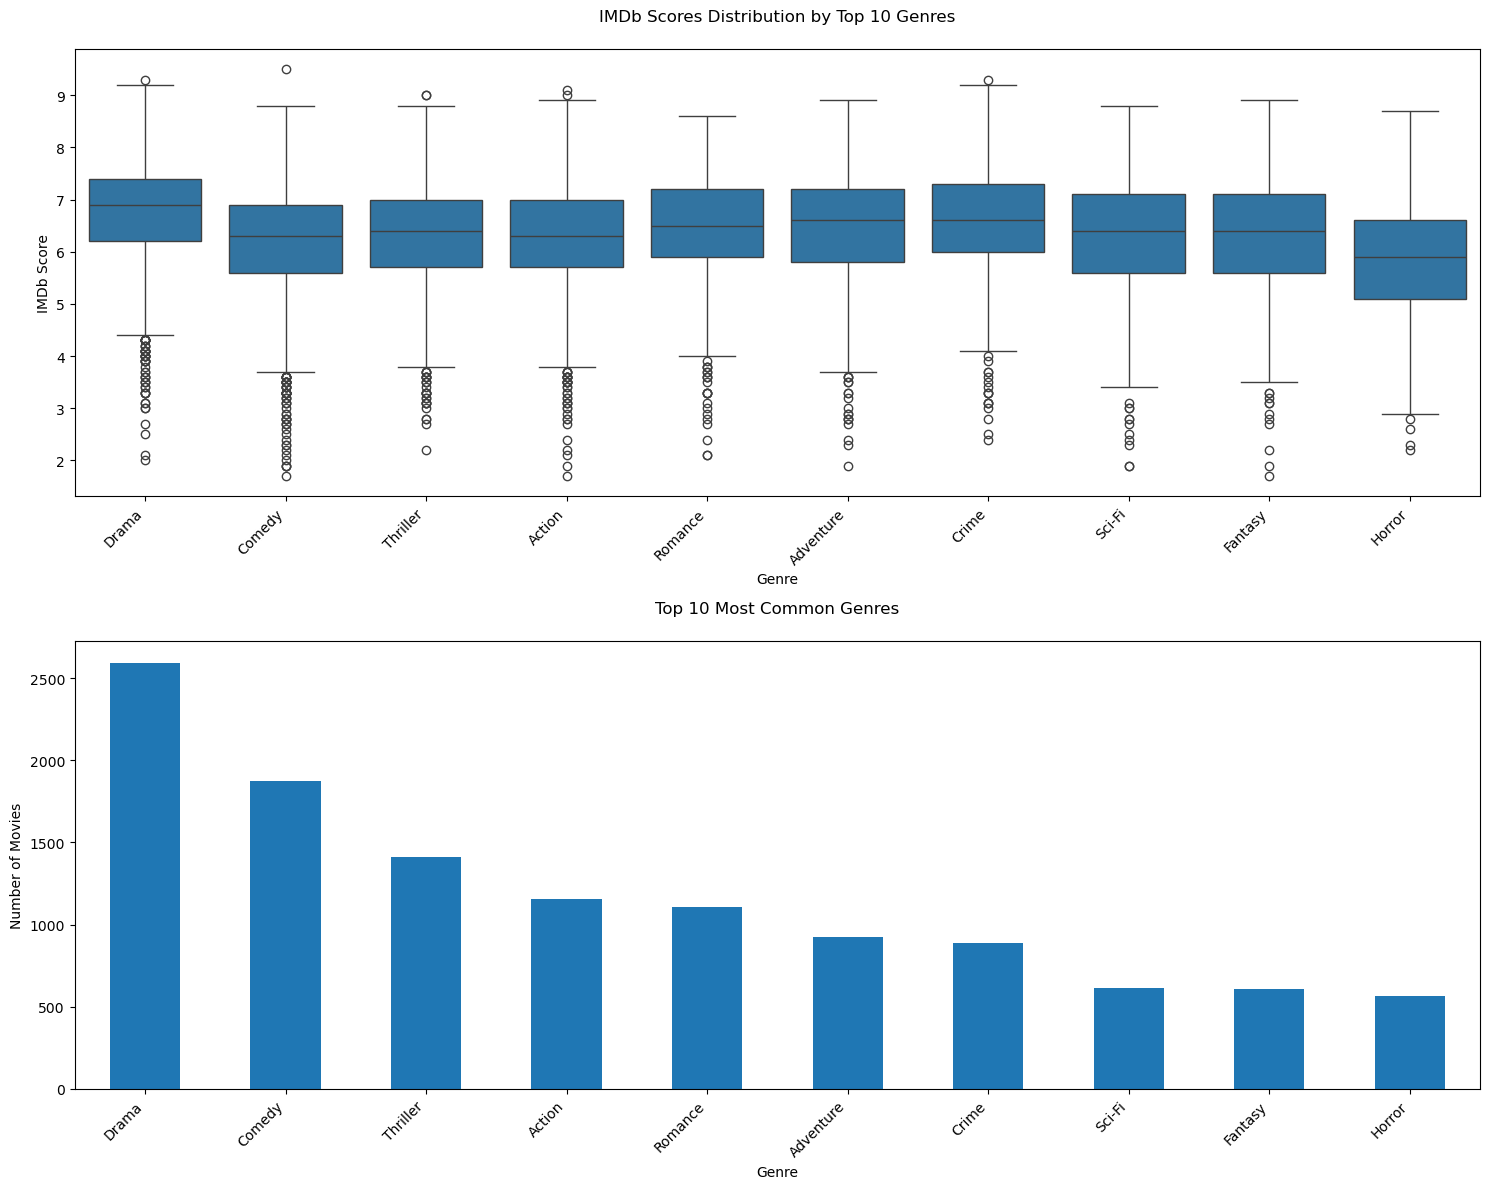


Average IMDb Score by Genre:
Drama: 6.76
Comedy: 6.20
Thriller: 6.31
Action: 6.24
Romance: 6.45
Adventure: 6.44
Crime: 6.56
Sci-Fi: 6.28
Fantasy: 6.31
Horror: 5.84


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# First, let's split the genres and get individual genre counts
def split_genres(genre_string):
    return str(genre_string).split('|')

# Create a list of all genres
all_genres = []
for genres in data['genres']:
    all_genres.extend(split_genres(genres))
genre_counts = pd.Series(all_genres).value_counts()

# Create two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Top subplot: Box plot of IMDb scores by genre
plt.subplot(211)
genre_imdb = []
genre_names = []

for genre in genre_counts.index[:10]:  # Top 10 genres
    # Get movies containing this genre
    mask = data['genres'].str.contains(genre, na=False)
    scores = data[mask]['imdb_score']
    genre_imdb.extend(scores)
    genre_names.extend([genre] * len(scores))

genre_data = pd.DataFrame({
    'Genre': genre_names,
    'IMDb Score': genre_imdb
})

sns.boxplot(x='Genre', y='IMDb Score', data=genre_data, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_title('IMDb Scores Distribution by Top 10 Genres', pad=20)

# Bottom subplot: Genre frequency bar plot
plt.subplot(212)
genre_counts[:10].plot(kind='bar')
plt.title('Top 10 Most Common Genres', pad=20)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Print average IMDb score by genre
print("\nAverage IMDb Score by Genre:")
for genre in genre_counts.index[:10]:
    mask = data['genres'].str.contains(genre, na=False)
    avg_score = data[mask]['imdb_score'].mean()
    print(f"{genre}: {avg_score:.2f}")

C:\Users\gargi\AppData\Local\Temp\ipykernel_29800\280194941.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,


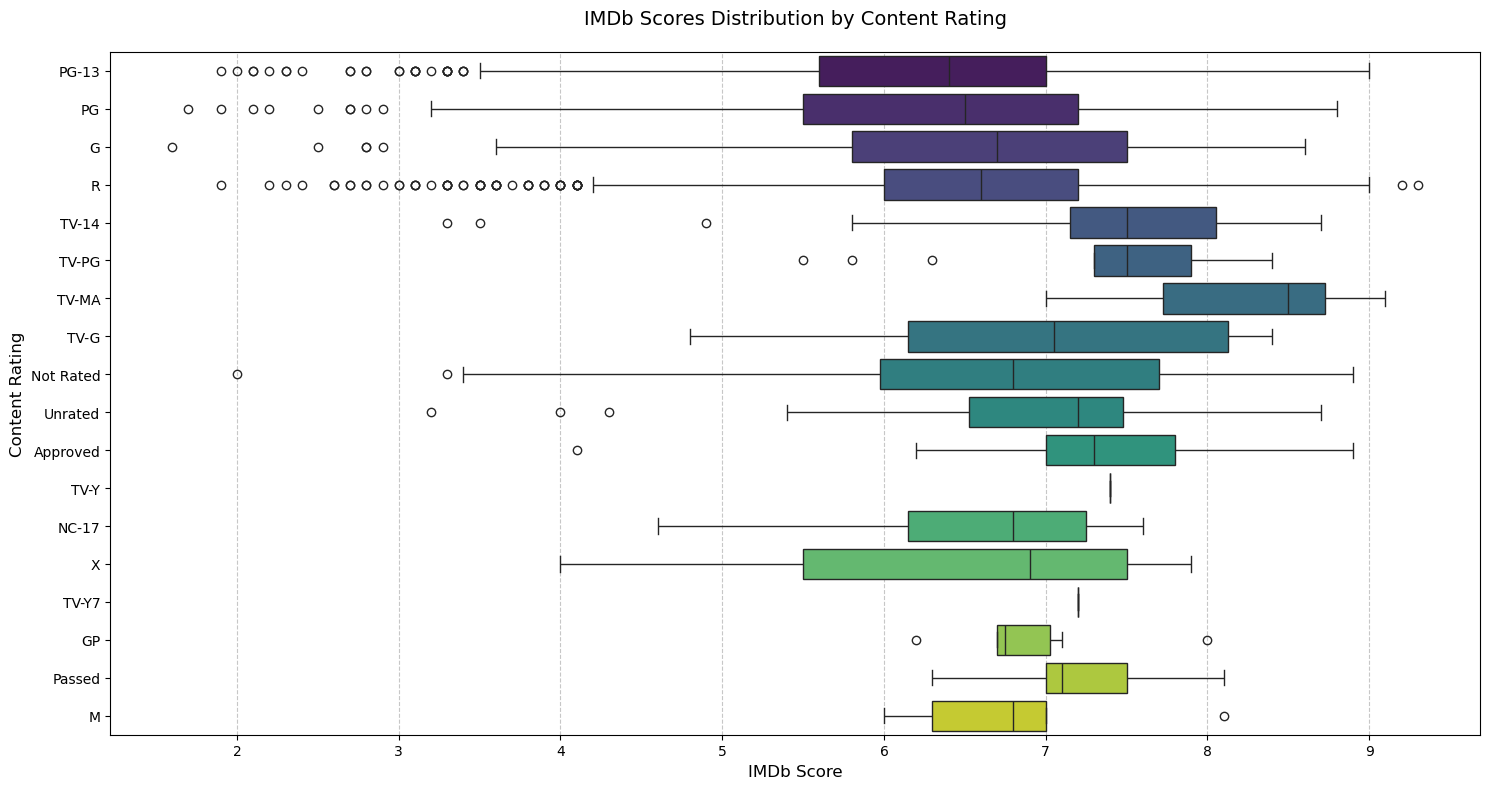


Summary Statistics by Content Rating:
                 count      mean       std  min    25%   50%    75%  max
content_rating                                                          
Approved          55.0  7.325455  0.714199  4.1  7.000  7.30  7.800  8.9
G                112.0  6.529464  1.401456  1.6  5.800  6.70  7.500  8.6
GP                 6.0  6.916667  0.604704  6.2  6.700  6.75  7.025  8.0
M                  5.0  6.840000  0.808084  6.0  6.300  6.80  7.000  8.1
NC-17              7.0  6.542857  1.022835  4.6  6.150  6.80  7.250  7.6
Not Rated        116.0  6.631034  1.342445  2.0  5.975  6.80  7.700  8.9
PG               701.0  6.294437  1.192314  1.7  5.500  6.50  7.200  8.8
PG-13           1461.0  6.257495  1.095936  1.9  5.600  6.40  7.000  9.0
Passed             9.0  7.166667  0.574456  6.3  7.000  7.10  7.500  8.1
R               2118.0  6.527101  1.031686  1.9  6.000  6.60  7.200  9.3
TV-14             30.0  7.250000  1.340033  3.3  7.150  7.50  8.050  8.7
TV-G        

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Create figure with larger size for better readability
plt.figure(figsize=(15, 8))

# Create boxplot with enhanced styling
sns.boxplot(data=data, 
           x='imdb_score',
           y='content_rating',
           palette='viridis',
           orient='h')  # Horizontal orientation for better label readability

# Customize the plot
plt.title('IMDb Scores Distribution by Content Rating', fontsize=14, pad=20)
plt.xlabel('IMDb Score', fontsize=12)
plt.ylabel('Content Rating', fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7, axis='x')

# Tight layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()

# Print summary statistics
print("\nSummary Statistics by Content Rating:")
summary_stats = data.groupby('content_rating')['imdb_score'].describe()
print(summary_stats)

In [17]:
# Genre frequency and IMDb scores by genre
def split_genres(genre_string):
    return str(genre_string).split('|')

all_genres = []
for genres in data['genres']:
    all_genres.extend(split_genres(genres))

genre_counts = pd.Series(all_genres).value_counts()
print("Genre Frequency:\n", genre_counts)


Genre Frequency:
 Drama          2594
Comedy         1872
Thriller       1411
Action         1153
Romance        1107
Adventure       923
Crime           889
Sci-Fi          616
Fantasy         610
Horror          565
Family          546
Mystery         500
Biography       293
Animation       242
Music           214
War             213
History         207
Sport           182
Musical         132
Documentary     121
Western          97
Film-Noir         6
Short             5
News              3
Reality-TV        2
Game-Show         1
Name: count, dtype: int64


In [19]:
def categorize_imdb(score):
    if score >= 6:
        return 'Hit'
    elif score >= 3:
        return 'Average'
    else:
        return 'Flop'

# Categorize IMDb scores into classes
data['Category'] = data['imdb_score'].apply(categorize_imdb)

In [21]:
import pandas as pd

# Load dataset
data_path = r"D:\BIA Data Science and AI\Capstone project\Movie-Prediction-main\Movie-Prediction\movie_metadata.csv"
df = pd.read_csv(data_path)

# Verify the dataset is loaded properly
print(f"Columns in dataset: {df.columns}")

# Handle missing values
categorical_columns = ['director_name', 'actor_1_name', 'genres']
for col in categorical_columns:
    if col in df.columns:
        df[col].fillna('', inplace=True)

numerical_columns = ['duration', 'gross', 'imdb_score']
for col in numerical_columns:
    if col in df.columns:
        df[col].fillna(0, inplace=True)

# Categorize IMDB scores into 'Hit', 'Average', or 'Flop'
if 'imdb_score' in df.columns:
    def classify_movie(score):
        if score <= 3:
            return 'Flop'
        elif 3 < score <= 6:
            return 'Average'
        else:
            return 'Hit'
    df['Classify'] = df['imdb_score'].apply(classify_movie)
else:
    raise KeyError("The column 'imdb_score' is missing from the dataset.")

# Verify the 'Classify' column is created successfully
print(f"Unique values in 'Classify': {df['Classify'].unique()}")

# Save preprocessed data to a CSV file (optional)
output_path = r"D:\BIA Data Science and AI\Capstone project\Movie-Prediction-main\Movie-Prediction\preprocessed_movie_data.csv"
df.to_csv(output_path, index=False)
print(f"Preprocessed data saved to: {output_path}")


Columns in dataset: Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')
Unique values in 'Classify': ['Hit' 'Average' 'Flop']
Preprocessed data saved to: D:\BIA Data Science and AI\Capstone project\Movie-Prediction-main\Movie-Prediction\preprocessed_movie_data.csv


C:\Users\gargi\AppData\Local\Temp\ipykernel_29800\946659493.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('', inplace=True)
C:\Users\gargi\AppData\Local\Temp\ipykernel_29800\946659493.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

In [25]:
print(f"Dataset columns: {df.columns}")
print(f"Number of rows: {df.shape[0]}")
if 'Classify' not in df.columns:
    raise KeyError("The 'Classify' column was not created. Check the `imdb_score` column and classification logic.")
print(f"Classify column created. Unique values: {df['Classify'].unique()}")


Dataset columns: Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'Classify'],
      dtype='object')
Number of rows: 5043
Classify column created. Unique values: ['Hit' 'Average' 'Flop']


In [28]:

import pandas as pd

# Load dataset
data_path = r"D:\BIA Data Science and AI\Capstone project\Movie-Prediction-main\Movie-Prediction\movie_metadata.csv"
df = pd.read_csv(data_path)

# Debugging: Check dataset columns and size
print(f"Columns in dataset: {df.columns}")
print(f"Number of rows: {df.shape[0]}")

# Ensure the 'imdb_score' column exists
if 'imdb_score' not in df.columns:
    raise KeyError("The required column 'imdb_score' is missing from the dataset.")

# Check for missing or invalid 'imdb_score' values
print(f"Unique values in 'imdb_score' before handling missing values: {df['imdb_score'].unique()}")
if df['imdb_score'].isnull().sum() > 0:
    print(f"Missing values in 'imdb_score': {df['imdb_score'].isnull().sum()}")
    df['imdb_score'].fillna(0, inplace=True)  # Replace missing scores with 0

# Handle invalid or unexpected scores
try:
    df['imdb_score'] = pd.to_numeric(df['imdb_score'], errors='coerce')
    df['imdb_score'].fillna(0, inplace=True)  # Handle non-numeric values by replacing with 0
except Exception as e:
    print(f"Error converting 'imdb_score' to numeric: {e}")
    raise

# Categorize IMDB scores into 'Hit', 'Average', or 'Flop'
def classify_movie(score):
    if score <= 3:
        return 'Flop'
    elif 3 < score <= 6:
        return 'Average'
    else:
        return 'Hit'

df['Classify'] = df['imdb_score'].apply(classify_movie)

# Debugging: Check if 'Classify' column is created and contains valid categories
if 'Classify' not in df.columns or df['Classify'].isnull().any():
    raise KeyError("The 'Classify' column was not created correctly. Check 'imdb_score' values and classification logic.")
print(f"'Classify' column created successfully. Unique values: {df['Classify'].unique()}")

# Save preprocessed data to a CSV file (optional)
output_path = r"D:\BIA Data Science and AI\Capstone project\Movie-Prediction-main\Movie-Prediction\preprocessed_movie_data.csv"
df.to_csv(output_path, index=False)
print(f"Preprocessed data saved to: {output_path}")


Columns in dataset: Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')
Number of rows: 5043
Unique values in 'imdb_score' before handling missing values: [7.9 7.1 6.8 8.5 6.6 6.2 7.8 7.5 6.9 6.1 6.7 7.3 6.5 7.2 8.1 7.  7.7 8.2
 5.9 6.  5.7 6.4 6.3 5.6 8.3 8.  8.4 5.8 5.4 9.  4.8 5.2 7.6 4.5 5.5 8.6
 8.8 5.1 7.4 4.2 5.  4.9 3.7 5.3 4.3 3.8 4.4 3.3 2.2 8.9 8.7 4.6 2.4 3.4
 4.1 4.7 3.  3.6 3.5 2.7 1.7 4.  2.  9.3 2.9 3.9 2.8 2.3 1.9 3.1 9.5 9.1
 1.6 2.5 2.1 3.2 9.2 2.6

C:\Users\gargi\AppData\Local\Temp\ipykernel_29800\1907652710.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['imdb_score'].fillna(0, inplace=True)  # Handle non-numeric values by replacing with 0


In [30]:

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
data_path = r"D:\BIA Data Science and AI\Capstone project\Movie-Prediction-main\Movie-Prediction\movie_metadata.csv"
df = pd.read_csv(data_path)

# Check if 'imdb_score' column exists
if 'imdb_score' not in df.columns:
    raise KeyError("'imdb_score' column is missing from the dataset. Please ensure the dataset is correct.")

# Categorize IMDB Scores into 'Hit', 'Average', or 'Flop'
def classify_movie(score):
    if score <= 3:
        return 'Flop'
    elif 3 < score <= 6:
        return 'Average'
    else:
        return 'Hit'

# Create 'Classify' column
df['Classify'] = df['imdb_score'].apply(classify_movie)

# Encode the target variable ('Classify') into numerical values
label_encoder = LabelEncoder()
df['Classify'] = label_encoder.fit_transform(df['Classify'])  # Encode 'Hit', 'Average', 'Flop'

# Define features and target
selected_features = ['imdb_score']  # Features
X = df[selected_features]
y = df['Classify']

# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.35, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models to compare
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_bal_acc = balanced_accuracy_score(y_train, y_pred_train)
    test_bal_acc = balanced_accuracy_score(y_test, y_pred_test)

    print(f"\n{model_name} Balanced Accuracy (Training): {train_bal_acc:.4f}")
    print(f"{model_name} Balanced Accuracy (Testing): {test_bal_acc:.4f}")

    print(f"\n{model_name} Classification Report (Test):")
    print(classification_report(y_test, y_pred_test, target_names=label_encoder.classes_))

    print(f"\n{model_name} Confusion Matrix (Test):")
    print(confusion_matrix(y_test, y_pred_test))

# Hyperparameter tuning for Random Forest
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],
    'class_weight': ['balanced', 'balanced_subsample'],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

random_search = RandomizedSearchCV(
    estimator=models['Random Forest'],
    param_distributions=param_distributions,
    scoring='balanced_accuracy',
    cv=10,
    n_iter=50,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_
print(f"\nBest Parameters for Random Forest: {random_search.best_params_}")
print(f"Best Balanced Accuracy (CV): {random_search.best_score_:.4f}")

y_pred_train_rf = best_rf.predict(X_train)
y_pred_test_rf = best_rf.predict(X_test)

train_bal_acc_rf = balanced_accuracy_score(y_train, y_pred_train_rf)
test_bal_acc_rf = balanced_accuracy_score(y_test, y_pred_test_rf)

print(f"\nTuned Random Forest Balanced Accuracy (Training): {train_bal_acc_rf:.4f}")
print(f"Tuned Random Forest Balanced Accuracy (Testing): {test_bal_acc_rf:.4f}")

print("\nTuned Random Forest Classification Report (Test):")
print(classification_report(y_test, y_pred_test_rf, target_names=label_encoder.classes_))

print("\nTuned Random Forest Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_test_rf))




Logistic Regression Balanced Accuracy (Training): 0.9940
Logistic Regression Balanced Accuracy (Testing): 0.9927

Logistic Regression Classification Report (Test):
              precision    recall  f1-score   support

     Average       1.00      0.98      0.99      1228
        Flop       0.98      1.00      0.99      1167
         Hit       1.00      1.00      1.00      1236

    accuracy                           0.99      3631
   macro avg       0.99      0.99      0.99      3631
weighted avg       0.99      0.99      0.99      3631


Logistic Regression Confusion Matrix (Test):
[[1201   27    0]
 [   0 1167    0]
 [   0    0 1236]]

Support Vector Machine Balanced Accuracy (Training): 0.9988
Support Vector Machine Balanced Accuracy (Testing): 0.9978

Support Vector Machine Classification Report (Test):
              precision    recall  f1-score   support

     Average       1.00      0.99      1.00      1228
        Flop       0.99      1.00      1.00      1167
         Hit    

In [ ]:
# Load preprocessed data
data_path = r"D:\BIA Data Science and AI\Capstone project\Movie-Prediction-main\Movie-Prediction\preprocessed_movie_data.csv"
df = pd.read_csv(data_path)

# Use only one feature for simplicity and introduce noise
selected_features = ['imdb_score']  
X = df[selected_features]
y = df['Classify']

# Add random noise to features
noise = np.random.normal(0, 1, X.shape)
X += noise

# Sample a smaller subset of the dataset if needed
df_small = df.sample(frac=0.1, random_state=42)  
X = df_small[selected_features]
y = df_small['Classify']

# Split data into training and testing sets without SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Train Random Forest with adjusted parameters
model = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=10)
model.fit(X_train, y_train)

# Evaluate model performance
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


# Handle missing values (as shown in your previous code)
# Fill missing numeric values with the median
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Define selected features
selected_features = ['imdb_score']

# Encode the target variable
label_encoder = LabelEncoder()
data['Category'] = data['imdb_score'].apply(lambda score: 'Hit' if score >= 6 else ('Average' if score >= 3 else 'Flop'))
data['Category_encoded'] = label_encoder.fit_transform(data['Category'])

# Define features and target variable
X = data[selected_features]  # Features with the selected 4 features
y = data['Category_encoded']  # Encoded target variable

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to evaluate models
def evaluate_model(model, X_test, y_test, y_pred):
    print(f"\nModel: {model}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Evaluate Random Forest
rf_y_pred = rf.predict(X_test)
evaluate_model("Random Forest", X_test, y_test, rf_y_pred)


Model: Random Forest
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


In [37]:
import joblib

# Save the model
joblib.dump(rf, 'movie_prediction_model.pkl')

['movie_prediction_model.pkl']

In [39]:
# Load the model
model = joblib.load('movie_prediction_model.pkl')

# Example input data
new_data = [[3]]

# Make prediction
prediction = model.predict(new_data)
print("Prediction:", label_encoder.inverse_transform(prediction))  # Decode the label

Prediction: ['Average']


C:\Users\gargi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


C:\Users\gargi\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


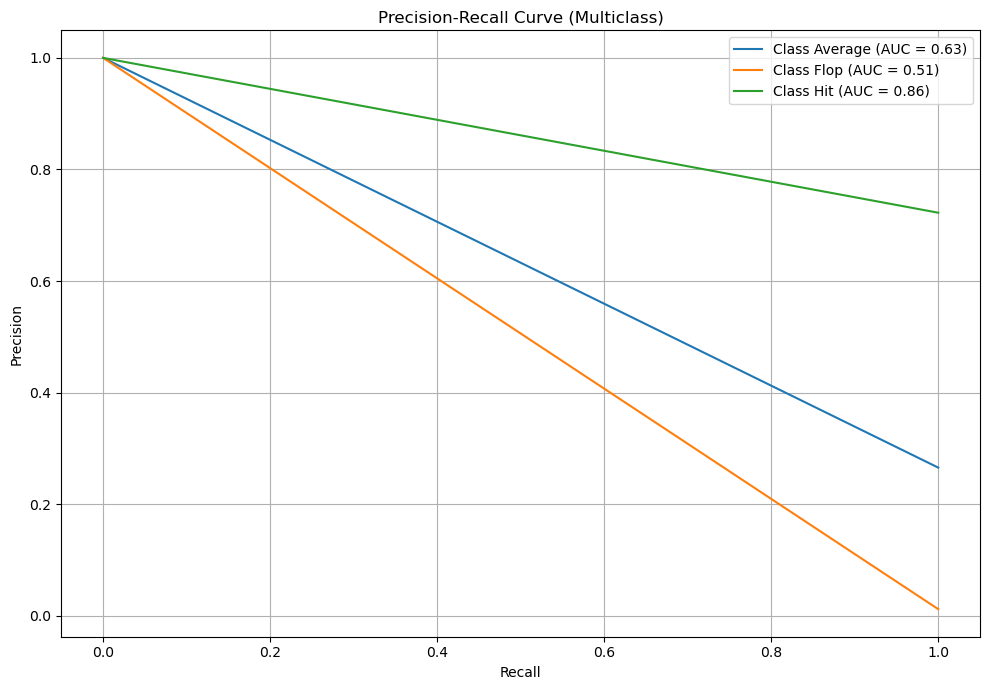

In [50]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output (One-vs-Rest strategy)
classes = label_encoder.classes_  # Assuming label_encoder is used earlier
y_test_binarized = label_binarize(y_test, classes=np.arange(len(classes)))
y_scores = best_rf.predict_proba(X_test)  # Probability estimates for each class

# Plot Precision-Recall curves for each class
plt.figure(figsize=(10, 7))
for i, class_name in enumerate(classes):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_scores[:, i])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f"Class {class_name} (AUC = {pr_auc:.2f})")

plt.title("Precision-Recall Curve (Multiclass)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.grid()
plt.tight_layout()
plt.show()


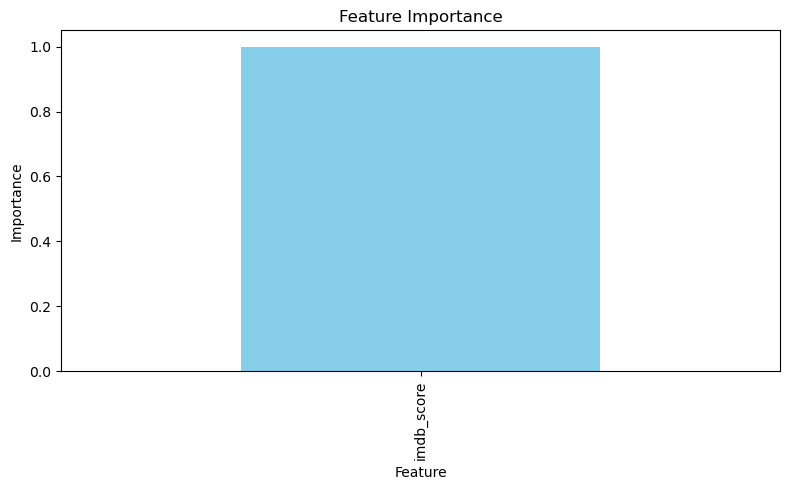

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'best_rf' is the trained Random Forest model and 'selected_features' is the feature list
# Calculate feature importances
feature_importances = best_rf.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
})

# Plot feature importances with moderate figure size
importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False, figsize=(8, 5), color='skyblue')
plt.title("Feature Importance")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()